<a href="https://colab.research.google.com/github/Aastik01us/BA-Airways-Job-Simulation-Forage/blob/main/BAirways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/customer_booking.csv", encoding='ISO-8859-1')

In [ ]:
print(df.head())
print(df.info())
print(df.describe())
print(df["booking_complete"].value_counts())

   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0        

In [ ]:
label_encoders = {}
categorical_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

<Axes: >

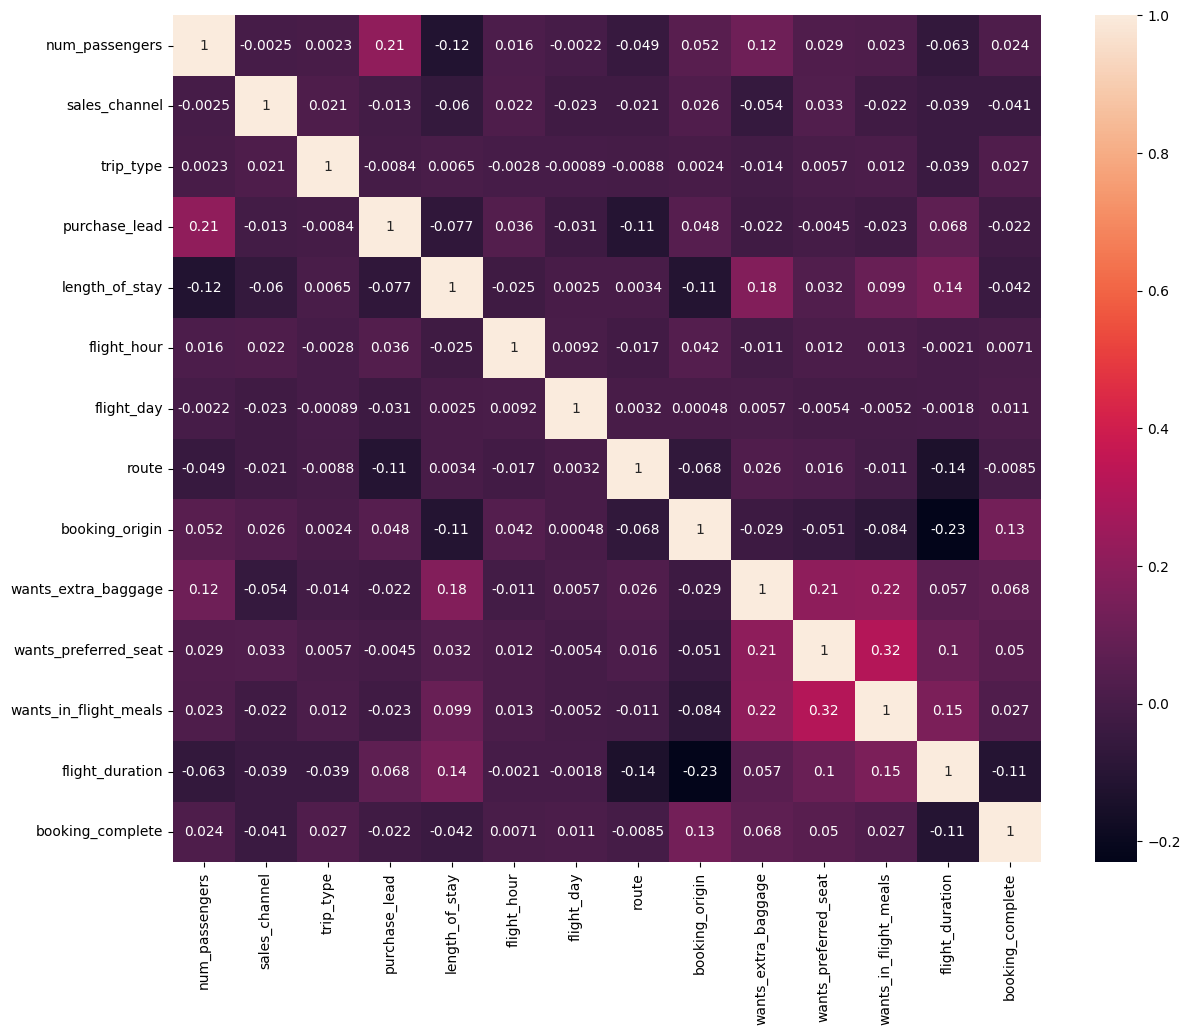

In [ ]:
corr = df.corr()
plt.figure(figsize= (14,11))
# plot the heatmap
sns.heatmap(corr, annot=True)

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.6, 0.4], flip_y=0.01, random_state=42)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

NameError: name 'train_test_split' is not defined

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_probs = clf.predict_proba(X_test)[:, 1]
threshold = 0.5
y_pred = (y_probs >= threshold).astype(int)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.9000
Precision: 0.8947
Recall: 0.8500
F1 Score: 0.8718
ROC AUC: 0.9356


In [ ]:
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Cross-Validation Accuracy: 0.8980


In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Best Threshold for max F1: {best_threshold:.4f}")


Best Threshold for max F1: 0.5000


In [ ]:
y_pred_best = (y_probs >= best_threshold).astype(int)

print("Metrics with best threshold:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.4f}")

Metrics with best threshold:
Accuracy: 0.9000
Precision: 0.8947
Recall: 0.8500
F1 Score: 0.8718
